<a href="https://colab.research.google.com/github/DanielMartinAlarcon/DS-Sprint-01-Dealing-With-Data/blob/master/DS_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

### Load the data as a pandas data frame.

In [1]:
# TODO

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Upgrade to the latest Seaborn to make sure that scatterplots exist.
!pip install seaborn --upgrade

data_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data'
data_raw = pd.read_csv(data_url)

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.9.0)


### Validate that it has the appropriate number of observations 

In [2]:
'''
I first confirm that the number of rows was correct. Website says there's 306
'''
data_raw.describe()

,30,64,1,1.1
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [3]:
'''
Hmm, looks like it's one column short of the right amount.  I bet that it lacks 
a header column.
'''
data_raw.head()

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [4]:
'''
Sure enough, those headers look like the first line of data to me.  Looking at 
the website confirms this.  I'll re-load with 'header=none' and also change the 
column names to reflect what the description says they are.
'''
data_raw = pd.read_csv(data_url, header=None)
data_raw.columns = ['age','year','nodes','survival']
data_raw.head()

,age,year,nodes,survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [5]:
data_raw.describe()

,age,year,nodes,survival
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


### Validate that you have no missing values.

In [6]:
# Are there any NaNs?
data_raw.isnull().sum()

age         0
year        0
nodes       0
survival    0
dtype: int64

In [7]:
# And just in case, are there any question marks?
'?' in data_raw.values

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  """Entry point for launching an IPython kernel.


False

### Add informative names to the features.
Did that one already.

###The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)


In [8]:
'''
Since this is the last cleanup operation, I'll create a new dataframe and 
call it 'data'
'''
data = data_raw
data.survival.replace(2,0, inplace=True)
data.head(15)

,age,year,nodes,survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,0
8,34,66,9,0
9,34,58,30,1


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [9]:
'''
First, some summary statistics.
'''
data.describe()

,age,year,nodes,survival
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,0.735294
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,0.000000
25%,44.000000,60.000000,0.000000,0.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,1.000000
max,83.000000,69.000000,52.000000,1.000000


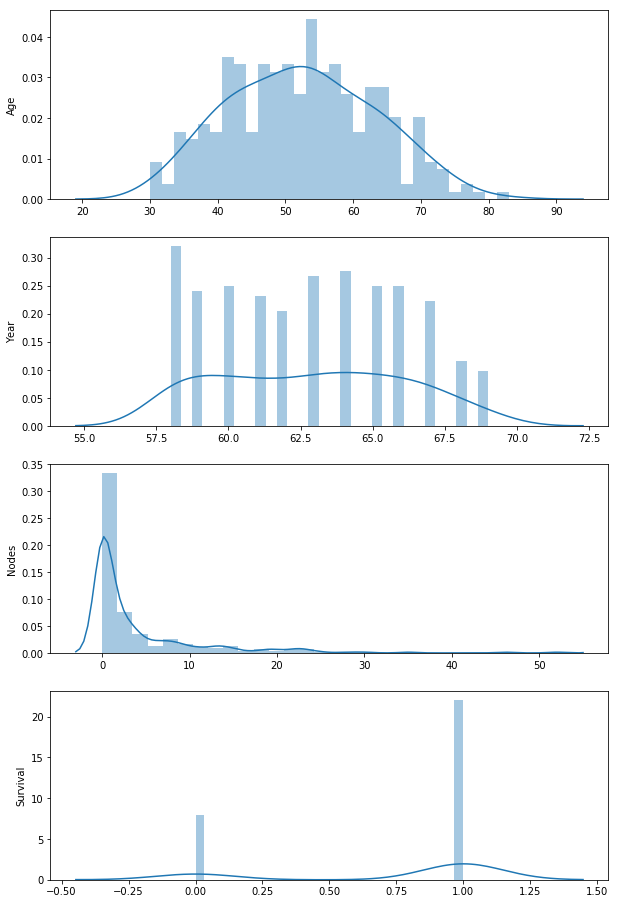

In [10]:
'''
Actually, I can't really grok this table.  Let's look at some histograms instead.
'''

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 16))

sns.distplot(data['age'], bins=30, ax=ax1, axlabel=False);
sns.distplot(data['year'], bins=30, ax=ax2, axlabel=False);
sns.distplot(data['nodes'], bins=30, ax=ax3, axlabel=False);
sns.distplot(data['survival'], bins=30, ax=ax4, axlabel=False);

ax1.set_ylabel("Age");
ax2.set_ylabel("Year");
ax3.set_ylabel("Nodes");
ax4.set_ylabel("Survival");

In [11]:
'''
There we go.  My first guess is that the number of nodes correlates inversely
with survival.  The first way to figure that out will be to crosstabulate 
nodes with survival.  I see from here that the number of nodes varies immensely,
though, so I'll have to bin them first.  Also, since the number of nodes is 
distributed very unevenly I bet that it's meaningful to use bins like 'zero',
'few', and 'lots'.
'''

node_bins = pd.cut(data.nodes, [0,1,3,10,100], include_lowest=True)
pd.crosstab(node_bins,data.survival, margins=True)

survival,0,1,All
nodes,,,
"(-0.001, 1.0]",27,150,177
"(1.0, 3.0]",12,28,40
"(3.0, 10.0]",19,30,49
"(10.0, 100.0]",23,17,40
All,81,225,306


In [12]:
'''
Sure enough, it looks (based on the total counts for each) like 
the proportion of survivors decreases significantly with the 
number of nodes found. Let's see if we can visualize this more directly,
by calculating the actual percentage of survivors in every bin
'''

pd.crosstab(node_bins,data.survival, margins=True, normalize='index')


survival,0,1
nodes,,
"(-0.001, 1.0]",0.152542,0.847458
"(1.0, 3.0]",0.300000,0.700000
"(3.0, 10.0]",0.387755,0.612245
"(10.0, 100.0]",0.575000,0.425000
All,0.264706,0.735294


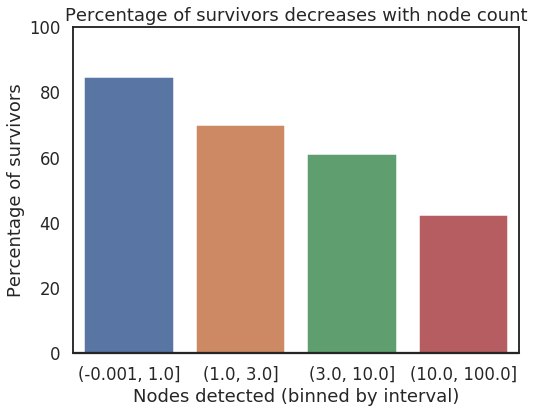

In [25]:
'''
Great, we have a pattern.  The difference between having zero nodes and 
more than ten is a factor of 2 in survival. Let's see if we can graph 
this so that it's a bit easier to see.
'''

nodes_vs_survival = pd.crosstab(node_bins,data.survival, normalize='index')
x = nodes_vs_survival[1].index
y = nodes_vs_survival[1].values*100

fig, ax = plt.subplots(1, figsize=(8,6));
sns.set(style="white", context="talk")
sns.barplot(x,y);
ax.set_ylabel("Percentage of survivors")
ax.set_xlabel("Nodes detected (binned by interval)")
ax.axhline(0, color="k", clip_on=False);
ax.set_title("Percentage of survivors decreases with node count")

# With percentages between 0 and 100 so that the client can see them better.
ax.set_ylim(0,100);

survival,0,1,All
age,,,
"(29.999, 35.0]",2,14,16
"(35.0, 40.0]",2,25,27
"(40.0, 45.0]",15,31,46
"(45.0, 50.0]",14,33,47
"(50.0, 55.0]",18,36,54
"(55.0, 60.0]",8,31,39
"(60.0, 65.0]",11,28,39
"(65.0, 70.0]",7,17,24
"(70.0, 90.0]",4,10,14


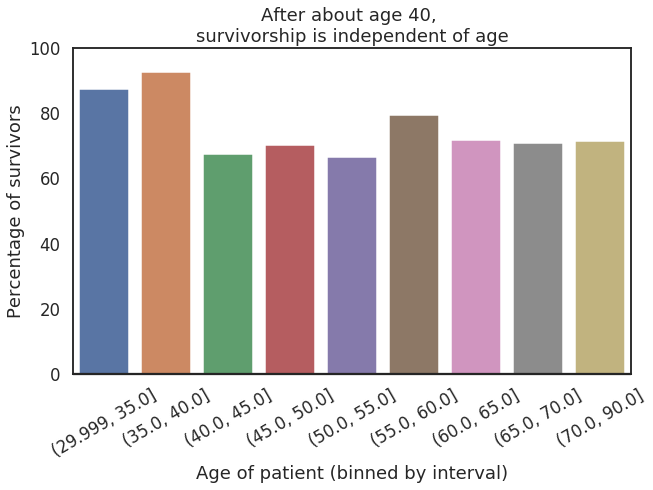

In [37]:
'''
Is there a similar pattern for age?  My best guess is that age is also negatively
correlated with survival, as younger people have had the cancer for fewer 
years and are generally stronger. Note that the last age bin is twice as wide as the others, to make sure that 
it isn't drastically smaller.  The number of patients per bin are presented 
below, to show that they aren't enormously different.
'''
age_bins = pd.cut(data.age, [30,35,40,45,50,55,60,65,70,90], include_lowest=True)
age_vs_survival = pd.crosstab(age_bins,data.survival, normalize='index')

x = age_vs_survival[1].index
y = age_vs_survival[1].values*100

fig, ax = plt.subplots(1, figsize=(10,6));
sns.set(style="white", context="talk")
sns.barplot(x,y);
ax.set_ylabel("Percentage of survivors")
ax.set_xlabel("Age of patient (binned by interval)")
ax.axhline(0, color="k", clip_on=False);
ax.set_title("After about age 40, \nsurvivorship is independent of age")
plt.xticks(rotation=30)

# With percentages between 0 and 100 so that the client can see them better.
ax.set_ylim(0,100);

# Table showing the number of patients in each bin
pd.crosstab(age_bins,data.survival, margins=True)

survival,0,1,All
year,,,
"(57.999, 59.1]",21,42,63
"(59.1, 60.2]",4,24,28
"(60.2, 61.3]",3,23,26
"(61.3, 62.4]",7,16,23
"(62.4, 63.5]",8,22,30
"(63.5, 64.6]",8,23,31
"(64.6, 65.7]",13,15,28
"(65.7, 66.8]",6,22,28
"(66.8, 67.9]",4,21,25


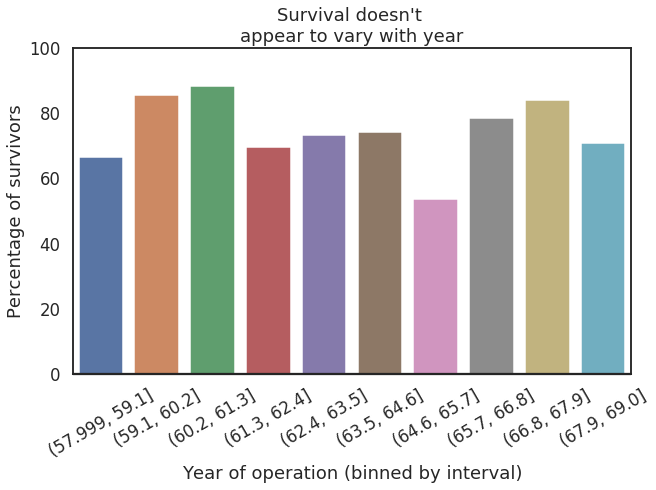

In [32]:
'''
Finally, what about the year when the patient was seen?  Did more modern patients 
fare better?
'''
year_bins = pd.cut(data.year, np.linspace(58,69, num=11), include_lowest=True)
year_vs_survival = pd.crosstab(year_bins,data.survival, normalize='index')

x = year_vs_survival[1].index
y = year_vs_survival[1].values*100

fig, ax = plt.subplots(1, figsize=(10,6));
sns.set(style="white", context="talk")
sns.barplot(x,y);
ax.set_ylabel("Percentage of survivors")
ax.set_xlabel("Year of operation (binned by interval)")
ax.axhline(0, color="k", clip_on=False);
ax.set_title("Survival doesn't \nappear to vary with year")
plt.xticks(rotation=30)

# With percentages between 0 and 100 so that the client can see them better.
ax.set_ylim(0,100);

pd.crosstab(year_bins,data.survival, margins=True)

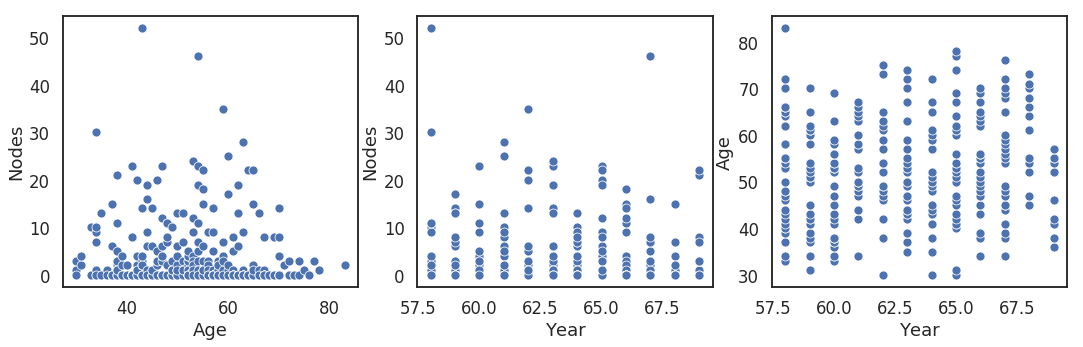

In [35]:
''' 
Alright, it looks like the number of nodes is the most significant variable.  
Does it vary with patient age, or even year of operation?
'''

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(18, 5))


sns.scatterplot(data['age'], data['nodes'], ax=ax1);
ax1.set_xlabel("Age");
ax1.set_ylabel("Nodes");

sns.scatterplot(data['year'], data['nodes'], ax=ax2);
ax2.set_xlabel("Year");
ax2.set_ylabel("Nodes");

sns.scatterplot(data['year'], data['age'], ax=ax3);
ax3.set_xlabel("Year");
ax3.set_ylabel("Age");



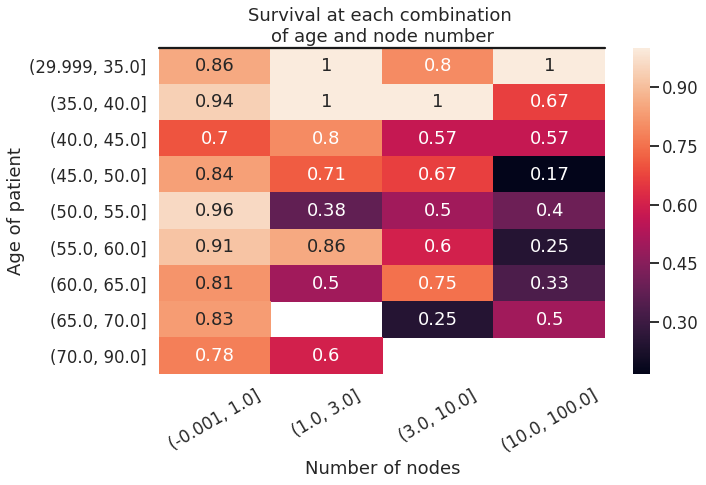

In [64]:
'''
No clear pattern here, though it looks like both ends of the age spectrum
correspond to patients with fewer nodes.  Age and nodes both look like they're 
distributed randomly through the years. 

However, let's look at survival at each combination of nodes and ages.
I'll write out my conclusions in the next section.
'''

age_bins = pd.cut(data.age, [30,35,40,45,50,55,60,65,70,90], include_lowest=True)
node_bins = pd.cut(data.nodes, [0,1,3,10,100], include_lowest=True)

# Since alive=1 and dead=0, taking thea mean of all the values in the 
# survival column gives you the proportion of survivors. Therefore, I can use the
# aggfunction 'mean'.
age_vs_nodes = pd.crosstab(age_bins,node_bins, aggfunc ='mean', values=data.survival)

fig, ax = plt.subplots(1, figsize=(10,6));
sns.set(style="white", context="talk")
sns.heatmap(age_vs_nodes, annot=True);
ax.set_xlabel("Number of nodes")
ax.set_ylabel("Age of patient")
ax.axhline(0, color="k", clip_on=False);
ax.set_title("Survival at each combination \nof age and node number")
plt.xticks(rotation=30);




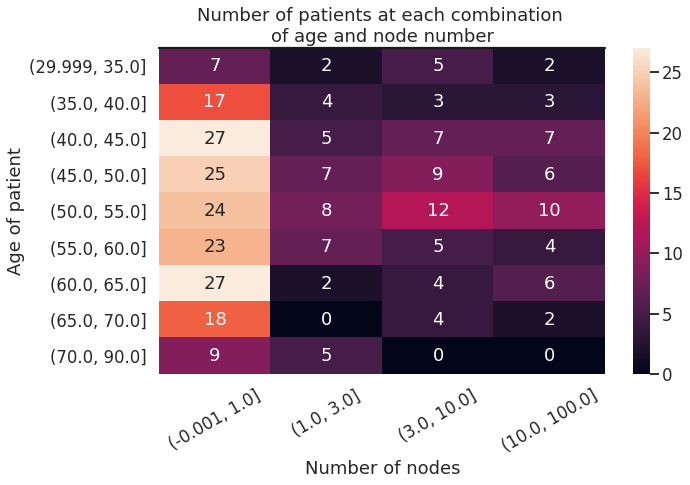

In [63]:
'''
And just to make sure that we aren't extrapolating from very small numbers,
here are the numbers of patients at each of the combinations above. Note how the
vertical and horizontal margins of this table look exactly like the histograms 
that I drew at the very first.  This is not extra informative, but now at least 
we can jee just how many patients are in each bin.
'''
age_bins = pd.cut(data.age, [30,35,40,45,50,55,60,65,70,90], include_lowest=True)
node_bins = pd.cut(data.nodes, [0,1,3,10,100], include_lowest=True)

# In the absence of an aggregation function, I just get a count of the patients.
age_vs_nodes = pd.crosstab(age_bins,node_bins)

fig, ax = plt.subplots(1, figsize=(10,6));
sns.set(style="white", context="talk")
sns.heatmap(age_vs_nodes, annot=True);
ax.set_xlabel("Number of nodes")
ax.set_ylabel("Age of patient")
ax.axhline(0, color="k", clip_on=False);
ax.set_title("Number of patients at each combination \nof age and node number")
plt.xticks(rotation=30);

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive correlation with survival?

*Youth.*  Being in the lowest bins for age (between 30 and 40) gives you a greater chance of survival. However, note that the proportion of survivors is about equivalent for later age bins. 

- What is at least one feature that looks to have a negative correlation with survival?

*Number of nodes.*  This is the strongest correlation I found. More nodes means less survival.

- How are those two features related with each other, and what might that mean?

The features are not strongly related to one another, but they definitely have a cumulative effect on the survival of patients.  Observe the first histogram above, also copied below. There is a clear pattern wherein younger patients with fewer nodes (top left) have better survival rates (lighter colors).  The exact contribution of each variable is the sort of thing I hope to calculate after I learn more about data analysis.


Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

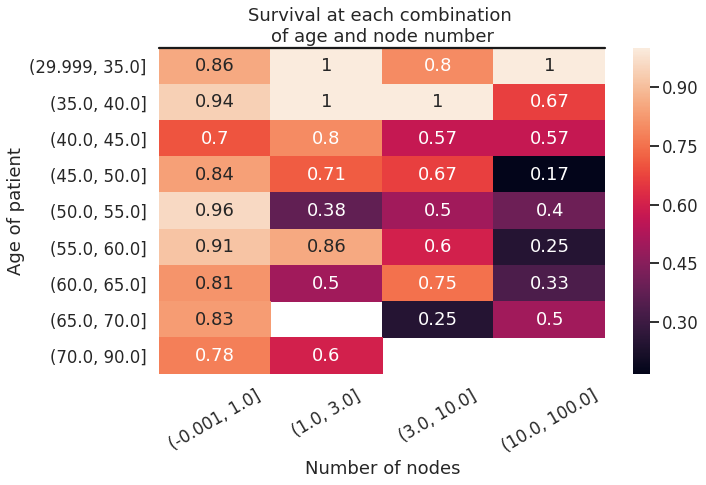

In [65]:
age_bins = pd.cut(data.age, [30,35,40,45,50,55,60,65,70,90], include_lowest=True)
node_bins = pd.cut(data.nodes, [0,1,3,10,100], include_lowest=True)

# Since alive=1 and dead=0, taking thea mean of all the values in the 
# survival column gives you the proportion of survivors. Therefore, I can use the
# aggfunction 'mean'.
age_vs_nodes = pd.crosstab(age_bins,node_bins, aggfunc ='mean', values=data.survival)

fig, ax = plt.subplots(1, figsize=(10,6));
sns.set(style="white", context="talk")
sns.heatmap(age_vs_nodes, annot=True);
ax.set_xlabel("Number of nodes")
ax.set_ylabel("Age of patient")
ax.axhline(0, color="k", clip_on=False);
ax.set_title("Survival at each combination \nof age and node number")
plt.xticks(rotation=30);